# Step 1: Reading and understanding the data

In [2]:
# supress warnings
import warnings
warnings.filterwarnings("ignore")

In [46]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

In [4]:
# reading the data
bikeshare = pd.read_csv(r"C:\Users\bhargavmeka\Downloads\day.csv")
bikeshare.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
# checking the shape of the data
bikeshare.shape

(730, 16)

In [6]:
# describe the data
bikeshare.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [7]:
bikeshare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [8]:
# checking for null values
bikeshare.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [9]:
# dropping the columns which are not required
bikeshare = bikeshare.drop(['instant','dteday','casual','registered'], axis=1)

In [10]:
# Mapping the season column to its respective values
bikeshare['season'] = bikeshare['season'].map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})

# Mapping the mnth column to its respective values
bikeshare['mnth'] = bikeshare['mnth'].map({1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'})

# Mapping the weekday column to its respective values
bikeshare['weekday'] = bikeshare['weekday'].map({0:'Sun', 1:'Mon', 2:'Tue', 3:'Wed', 4:'Thu', 5:'Fri', 6:'Sat'})

# Mapping the weathersit column to its respective values
bikeshare['weathersit'] = bikeshare['weathersit'].map({1:'Clear', 2:'Mist', 3:'Light Snow', 4:'Heavy Rain'})

# checking the data after mapping
bikeshare.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,Sat,0,Mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Sun,0,Mist,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [11]:
bikeshare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


## Step 2:Visualizing the data

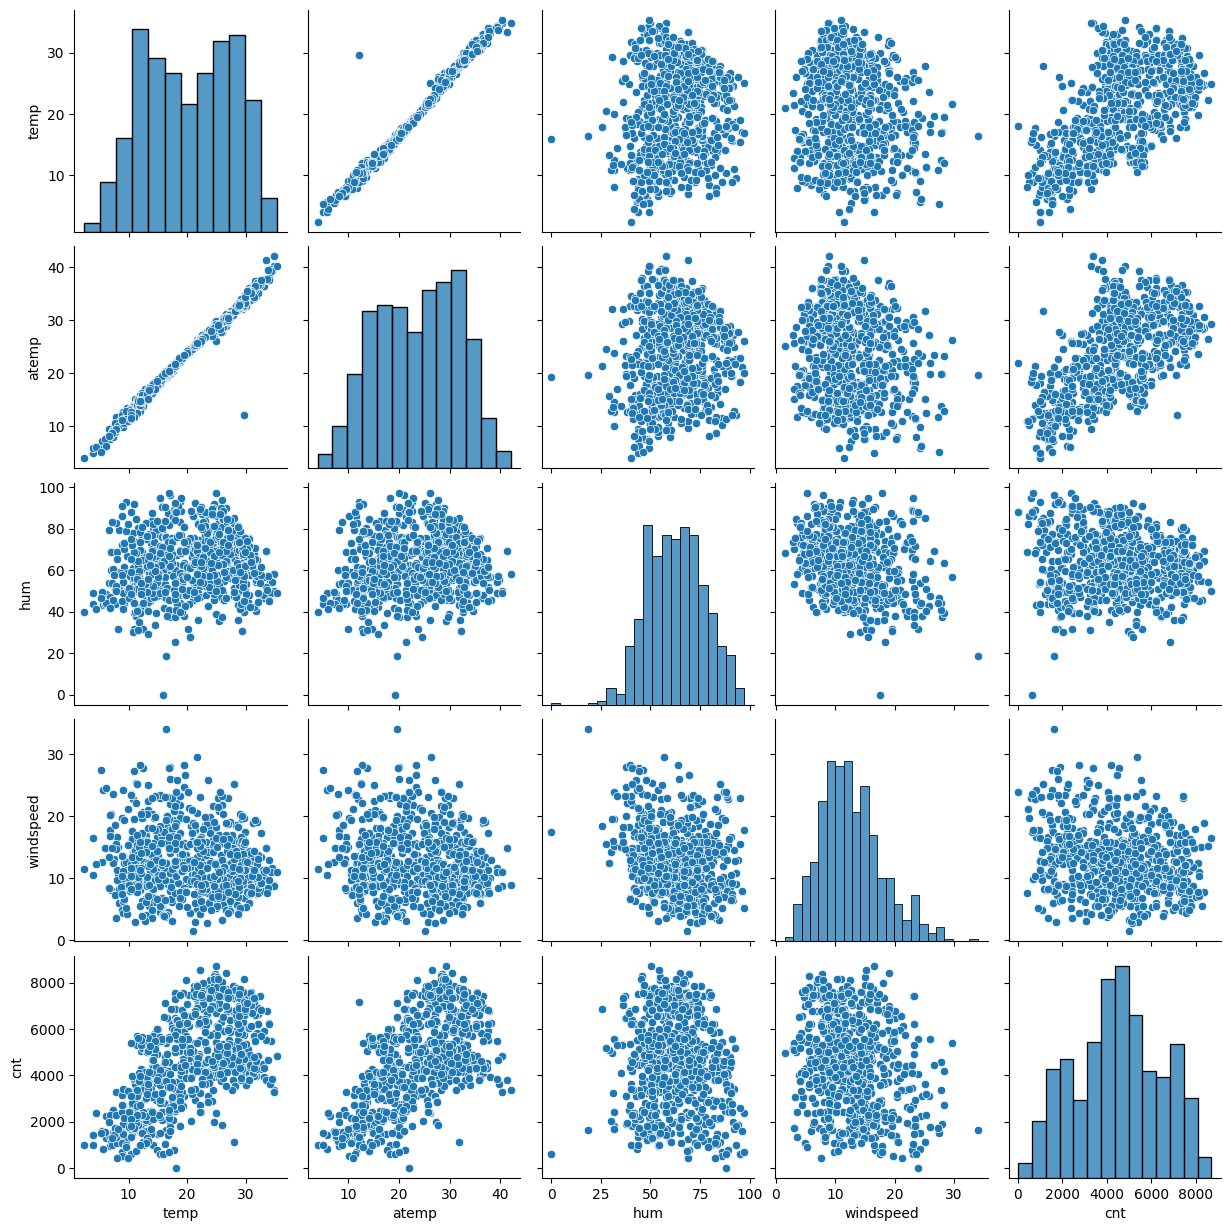

In [12]:
# Visualising the numerical variables
sns.pairplot(data=bikeshare, vars=['temp','atemp','hum','windspeed','cnt'])
plt.show()




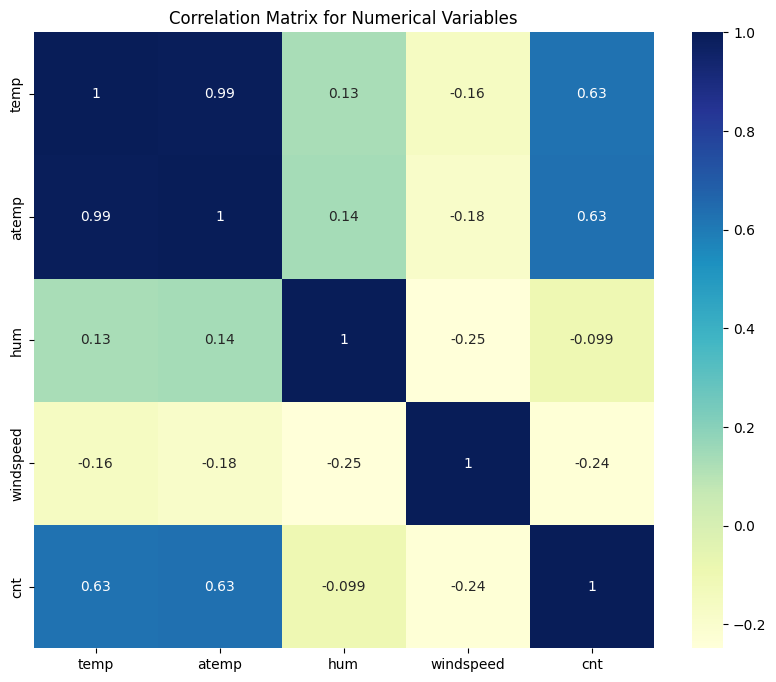

In [13]:
# Correlation matrix for numerical variables
plt.figure(figsize=(10,8))
sns.heatmap(bikeshare[['temp','atemp','hum','windspeed','cnt']].corr(), annot=True, cmap='YlGnBu')
plt.title('Correlation Matrix for Numerical Variables')
plt.show()

## There is a high correlation between temp and atemp. This is multicollinearity. So, we can drop one of the columns based on VIF and p-value

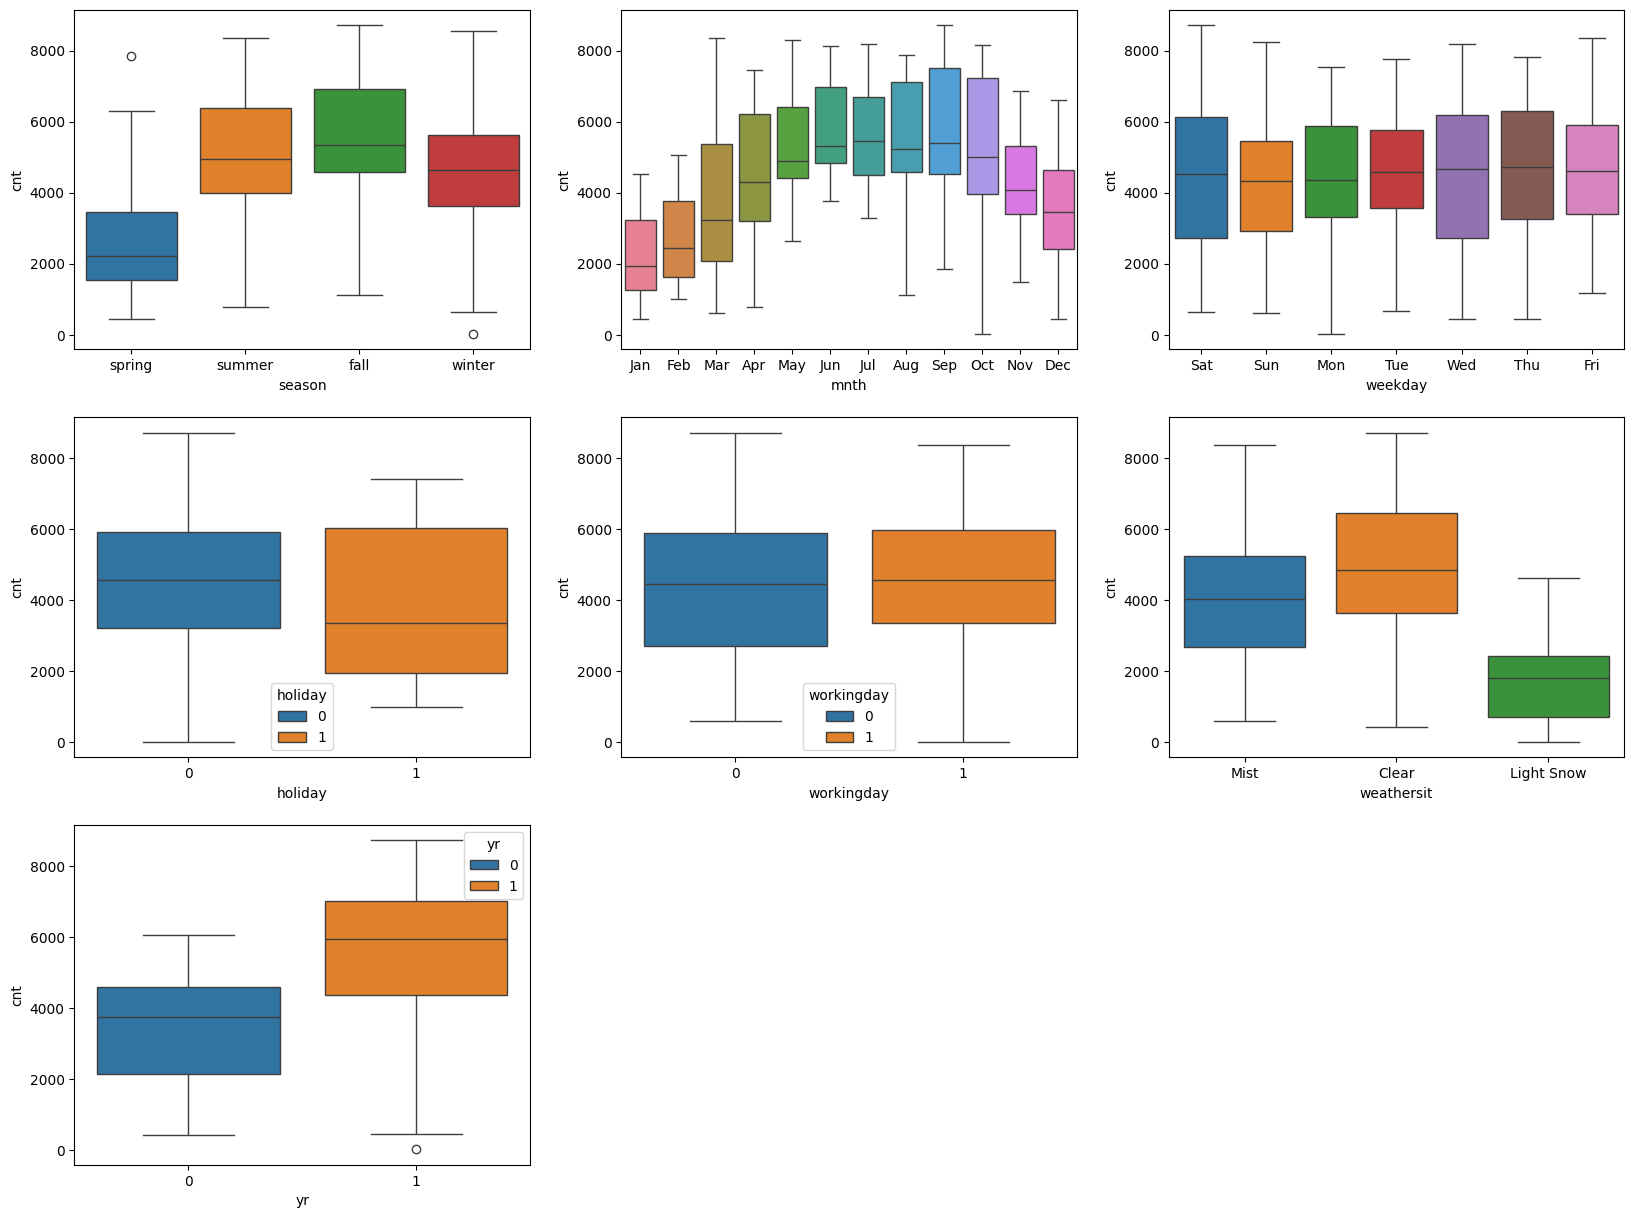

In [14]:
# Visualising the categorical variables
plt.figure(figsize=(20, 15))
plt.subplot(3,3,1)
sns.boxplot(x='season', y='cnt', hue='season', data=bikeshare)
plt.subplot(3,3,2)
sns.boxplot(x='mnth', y='cnt', hue='mnth', data=bikeshare)
plt.subplot(3,3,3)
sns.boxplot(x='weekday', y='cnt', hue='weekday', data=bikeshare)
plt.subplot(3,3,4)
sns.boxplot(x='holiday', y='cnt', hue='holiday', data=bikeshare)
plt.subplot(3,3,5)
sns.boxplot(x='workingday', y='cnt', hue='workingday', data=bikeshare)
plt.subplot(3,3,6)
sns.boxplot(x='weathersit', y='cnt', hue='weathersit', data=bikeshare)
plt.subplot(3,3,7)
sns.boxplot(x='yr', y='cnt', hue='yr', data=bikeshare)
plt.show()

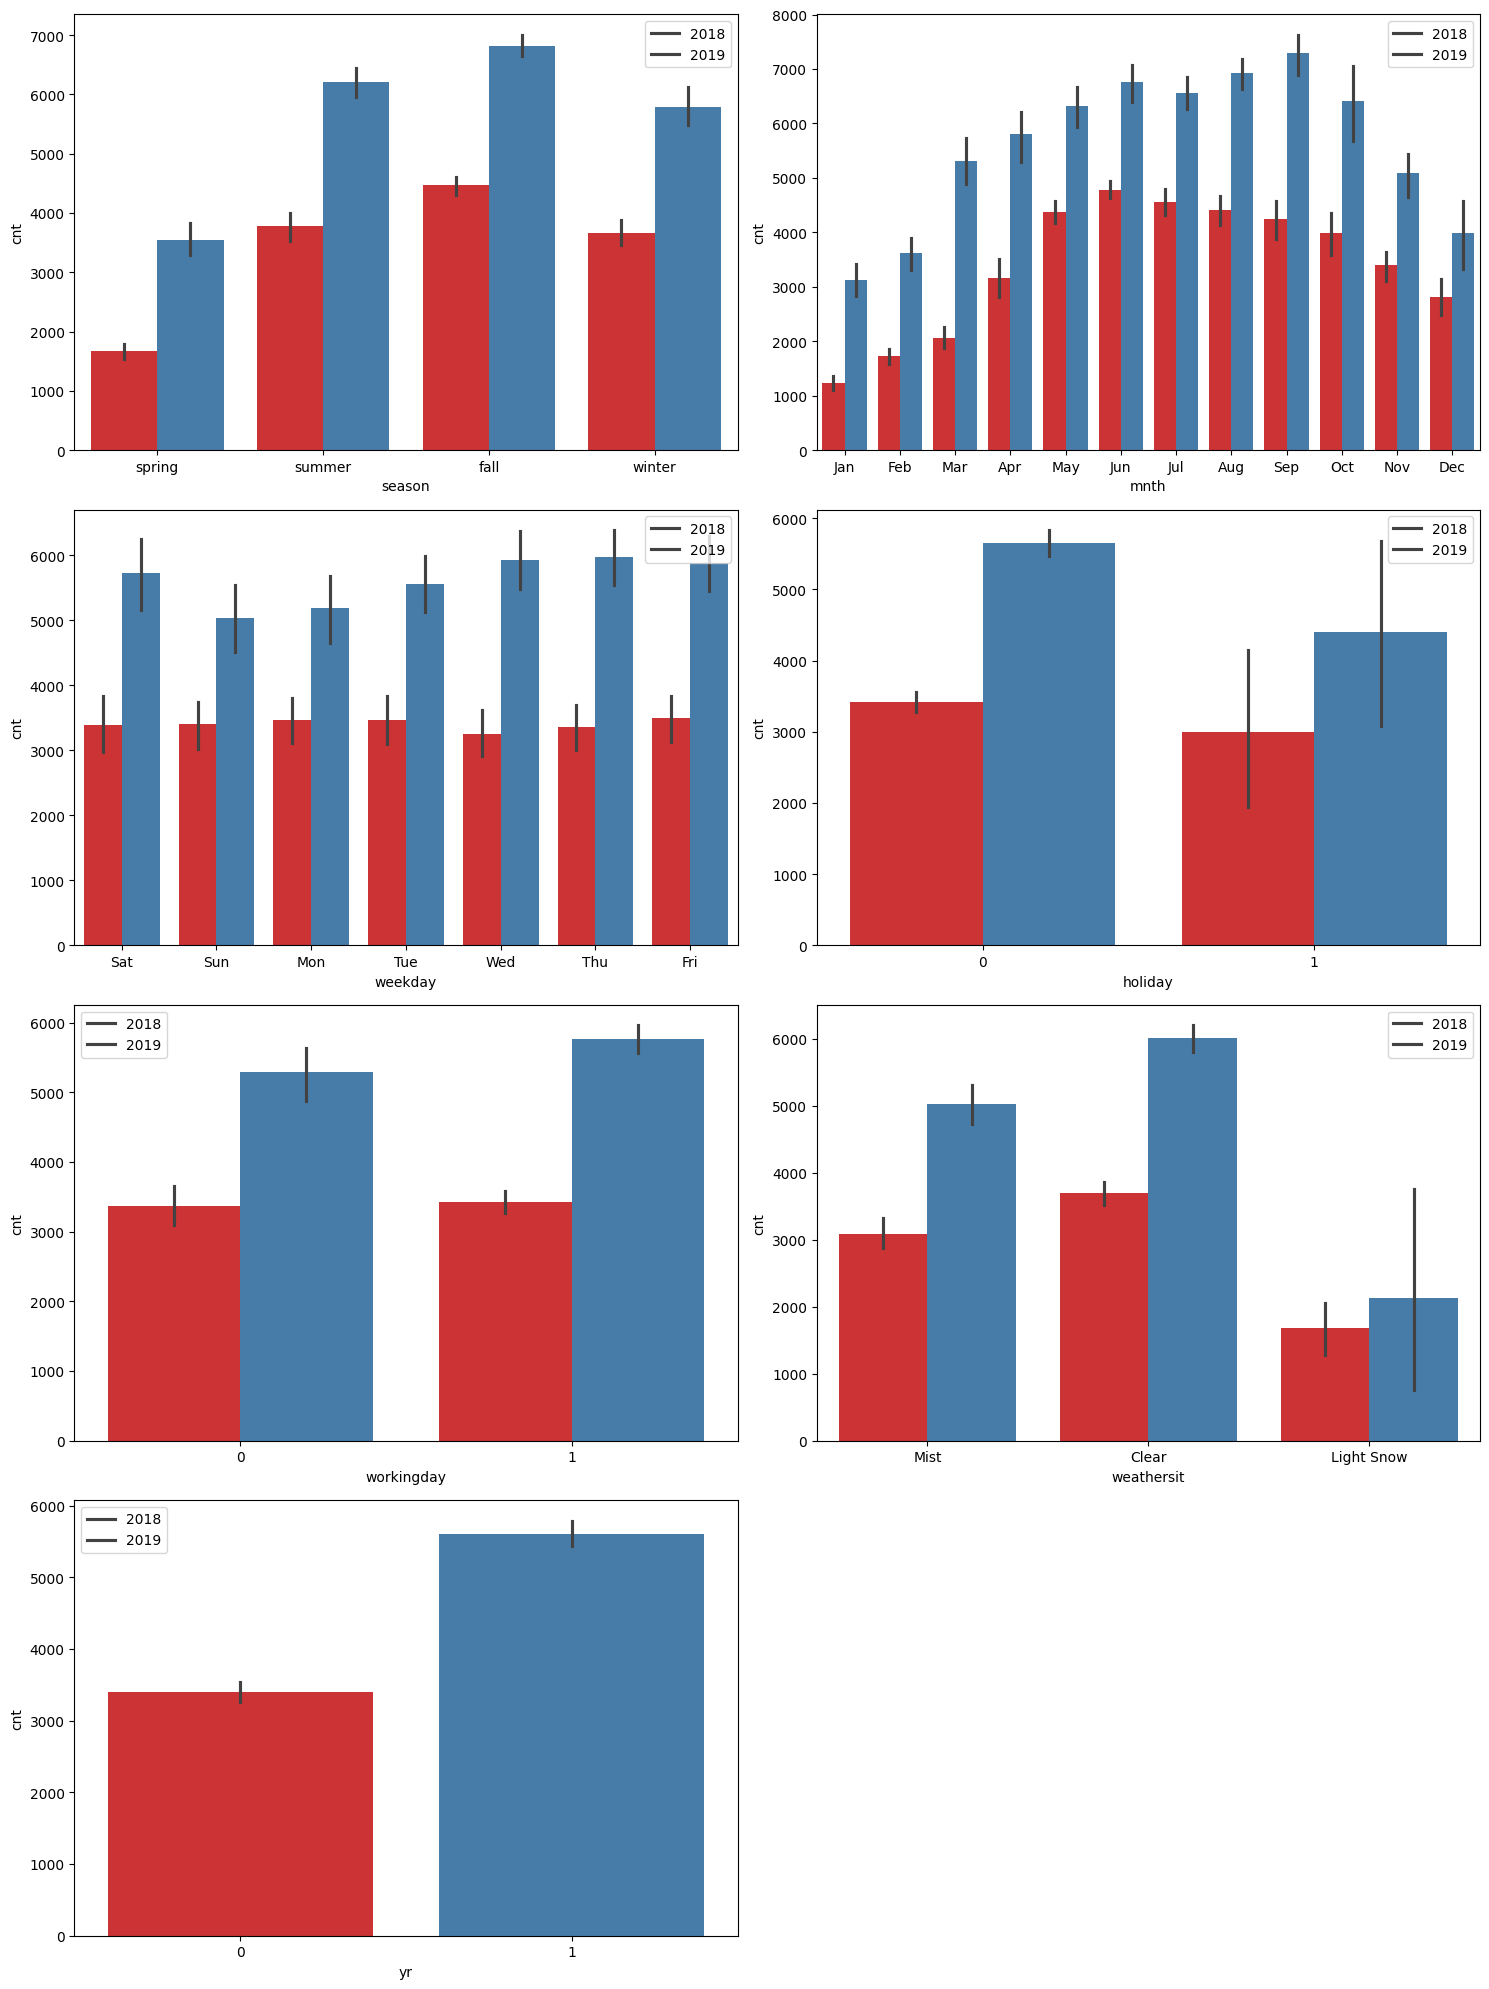

In [15]:
def plot_cat_columns(column, subplot):
    sns.barplot(x=column, y='cnt', data=bikeshare, hue='yr', palette='Set1', ax=subplot)
    subplot.legend(labels=['2018', '2019'])

fig, axs = plt.subplots(4, 2, figsize=(15, 20))
plot_cat_columns('season', axs[0, 0])
plot_cat_columns('mnth', axs[0, 1])
plot_cat_columns('weekday', axs[1, 0])
plot_cat_columns('holiday', axs[1, 1])
plot_cat_columns('workingday', axs[2, 0])
plot_cat_columns('weathersit', axs[2, 1])
plot_cat_columns('yr', axs[3, 0])

# Remove the unused subplot
fig.delaxes(axs[3,1])

plt.tight_layout()
plt.show()

# Observations:
1. The demand for bikes is high in the fall in both the years.
2. The demand for bikes is high in the months of May, June, July, August, September, and October in both the years.
3. Clear weather has the highest demand for bikes in both the years.
4. Thu, Fri and Sat have the highest demand for bikes in both the years.
5. The demand for bikes is high on holidays in both years.
6. Working days and non-working days have the same demand for bikes in both the years.
7. In all the plots, 2019 has a higher demand for bikes than 2018.

# Step 3: Data Preparation

In [25]:
# Dummy variables for categorical variables with more than 2 categories
bikeshare_season = pd.get_dummies(bikeshare['season'], drop_first=True, dtype='uint8')
bikeshare_mnth = pd.get_dummies(bikeshare['mnth'], drop_first=True, dtype='uint8')
bikeshare_weekday = pd.get_dummies(bikeshare['weekday'], drop_first=True, dtype='uint8')
bikeshare_weathersit = pd.get_dummies(bikeshare['weathersit'], drop_first=True, dtype='uint8')

In [26]:
# Concatenating the dummy variables to the main dataframe
bikeshare_new = pd.concat([bikeshare, bikeshare_season, bikeshare_mnth, bikeshare_weekday, bikeshare_weathersit], axis=1)

In [27]:
bikeshare_new.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist
0,spring,0,Jan,0,Sat,0,Mist,14.110847,18.18125,80.5833,...,0,0,0,1,0,0,0,0,0,1
1,spring,0,Jan,0,Sun,0,Mist,14.902598,17.68695,69.6087,...,0,0,0,0,1,0,0,0,0,1
2,spring,0,Jan,0,Mon,1,Clear,8.050924,9.47025,43.7273,...,0,0,1,0,0,0,0,0,0,0
3,spring,0,Jan,0,Tue,1,Clear,8.200000,10.60610,59.0435,...,0,0,0,0,0,0,1,0,0,0
4,spring,0,Jan,0,Wed,1,Clear,9.305237,11.46350,43.6957,...,0,0,0,0,0,0,0,1,0,0


In [28]:
bikeshare_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 34 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
 12  spring      730 non-null    uint8  
 13  summer      730 non-null    uint8  
 14  winter      730 non-null    uint8  
 15  Aug         730 non-null    uint8  
 16  Dec         730 non-null    uint8  
 17  Feb         730 non-null    uint8  
 18  Jan         730 non-null    uint8  
 19  Jul         730 non-null    u

In [29]:
# Dropping the original columns for which dummy variables are created
bikeshare_new = bikeshare_new.drop(['season','mnth','weekday','weathersit'], axis=1)

In [31]:
bikeshare_new.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,1,0,0


In [32]:
# Checking the shape of the new dataframe
bikeshare_new.shape

(730, 30)

In [33]:
# Checking the column info of the new dataframe
bikeshare_new.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   yr          730 non-null    int64  
 1   holiday     730 non-null    int64  
 2   workingday  730 non-null    int64  
 3   temp        730 non-null    float64
 4   atemp       730 non-null    float64
 5   hum         730 non-null    float64
 6   windspeed   730 non-null    float64
 7   cnt         730 non-null    int64  
 8   spring      730 non-null    uint8  
 9   summer      730 non-null    uint8  
 10  winter      730 non-null    uint8  
 11  Aug         730 non-null    uint8  
 12  Dec         730 non-null    uint8  
 13  Feb         730 non-null    uint8  
 14  Jan         730 non-null    uint8  
 15  Jul         730 non-null    uint8  
 16  Jun         730 non-null    uint8  
 17  Mar         730 non-null    uint8  
 18  May         730 non-null    uint8  
 19  Nov         730 non-null    u

# Step 4: Splitting the Data into Training and Testing Sets

In [34]:
# Splitting the data into train and test
np.random.seed(0)
bikeshare_train, bikeshare_test = train_test_split(bikeshare_new, train_size=0.7, test_size=0.3, random_state=100)

In [35]:
# Checking the shape of the train and test data
print(bikeshare_train.shape)
print(bikeshare_test.shape)

(510, 30)
(219, 30)


In [36]:
# Scaling the numerical variables using MinMaxScaler
scaler = MinMaxScaler()
num_vars = ['temp','atemp','hum','windspeed','cnt']
bikeshare_train[num_vars] = scaler.fit_transform(bikeshare_train[num_vars])

In [37]:
# Checking the head of the train data
bikeshare_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,...,1,0,0,0,0,0,1,0,0,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,...,0,0,0,1,0,0,0,0,0,1


In [38]:
# describe the train data
bikeshare_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537262,0.512989,0.650369,0.320768,0.513620,0.243137,0.245098,...,0.086275,0.080392,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824,0.029412,0.343137
std,0.500429,0.157763,0.468282,0.225844,0.212385,0.145882,0.169797,0.224593,0.429398,0.430568,...,0.281045,0.272166,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870,0.169124,0.475223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


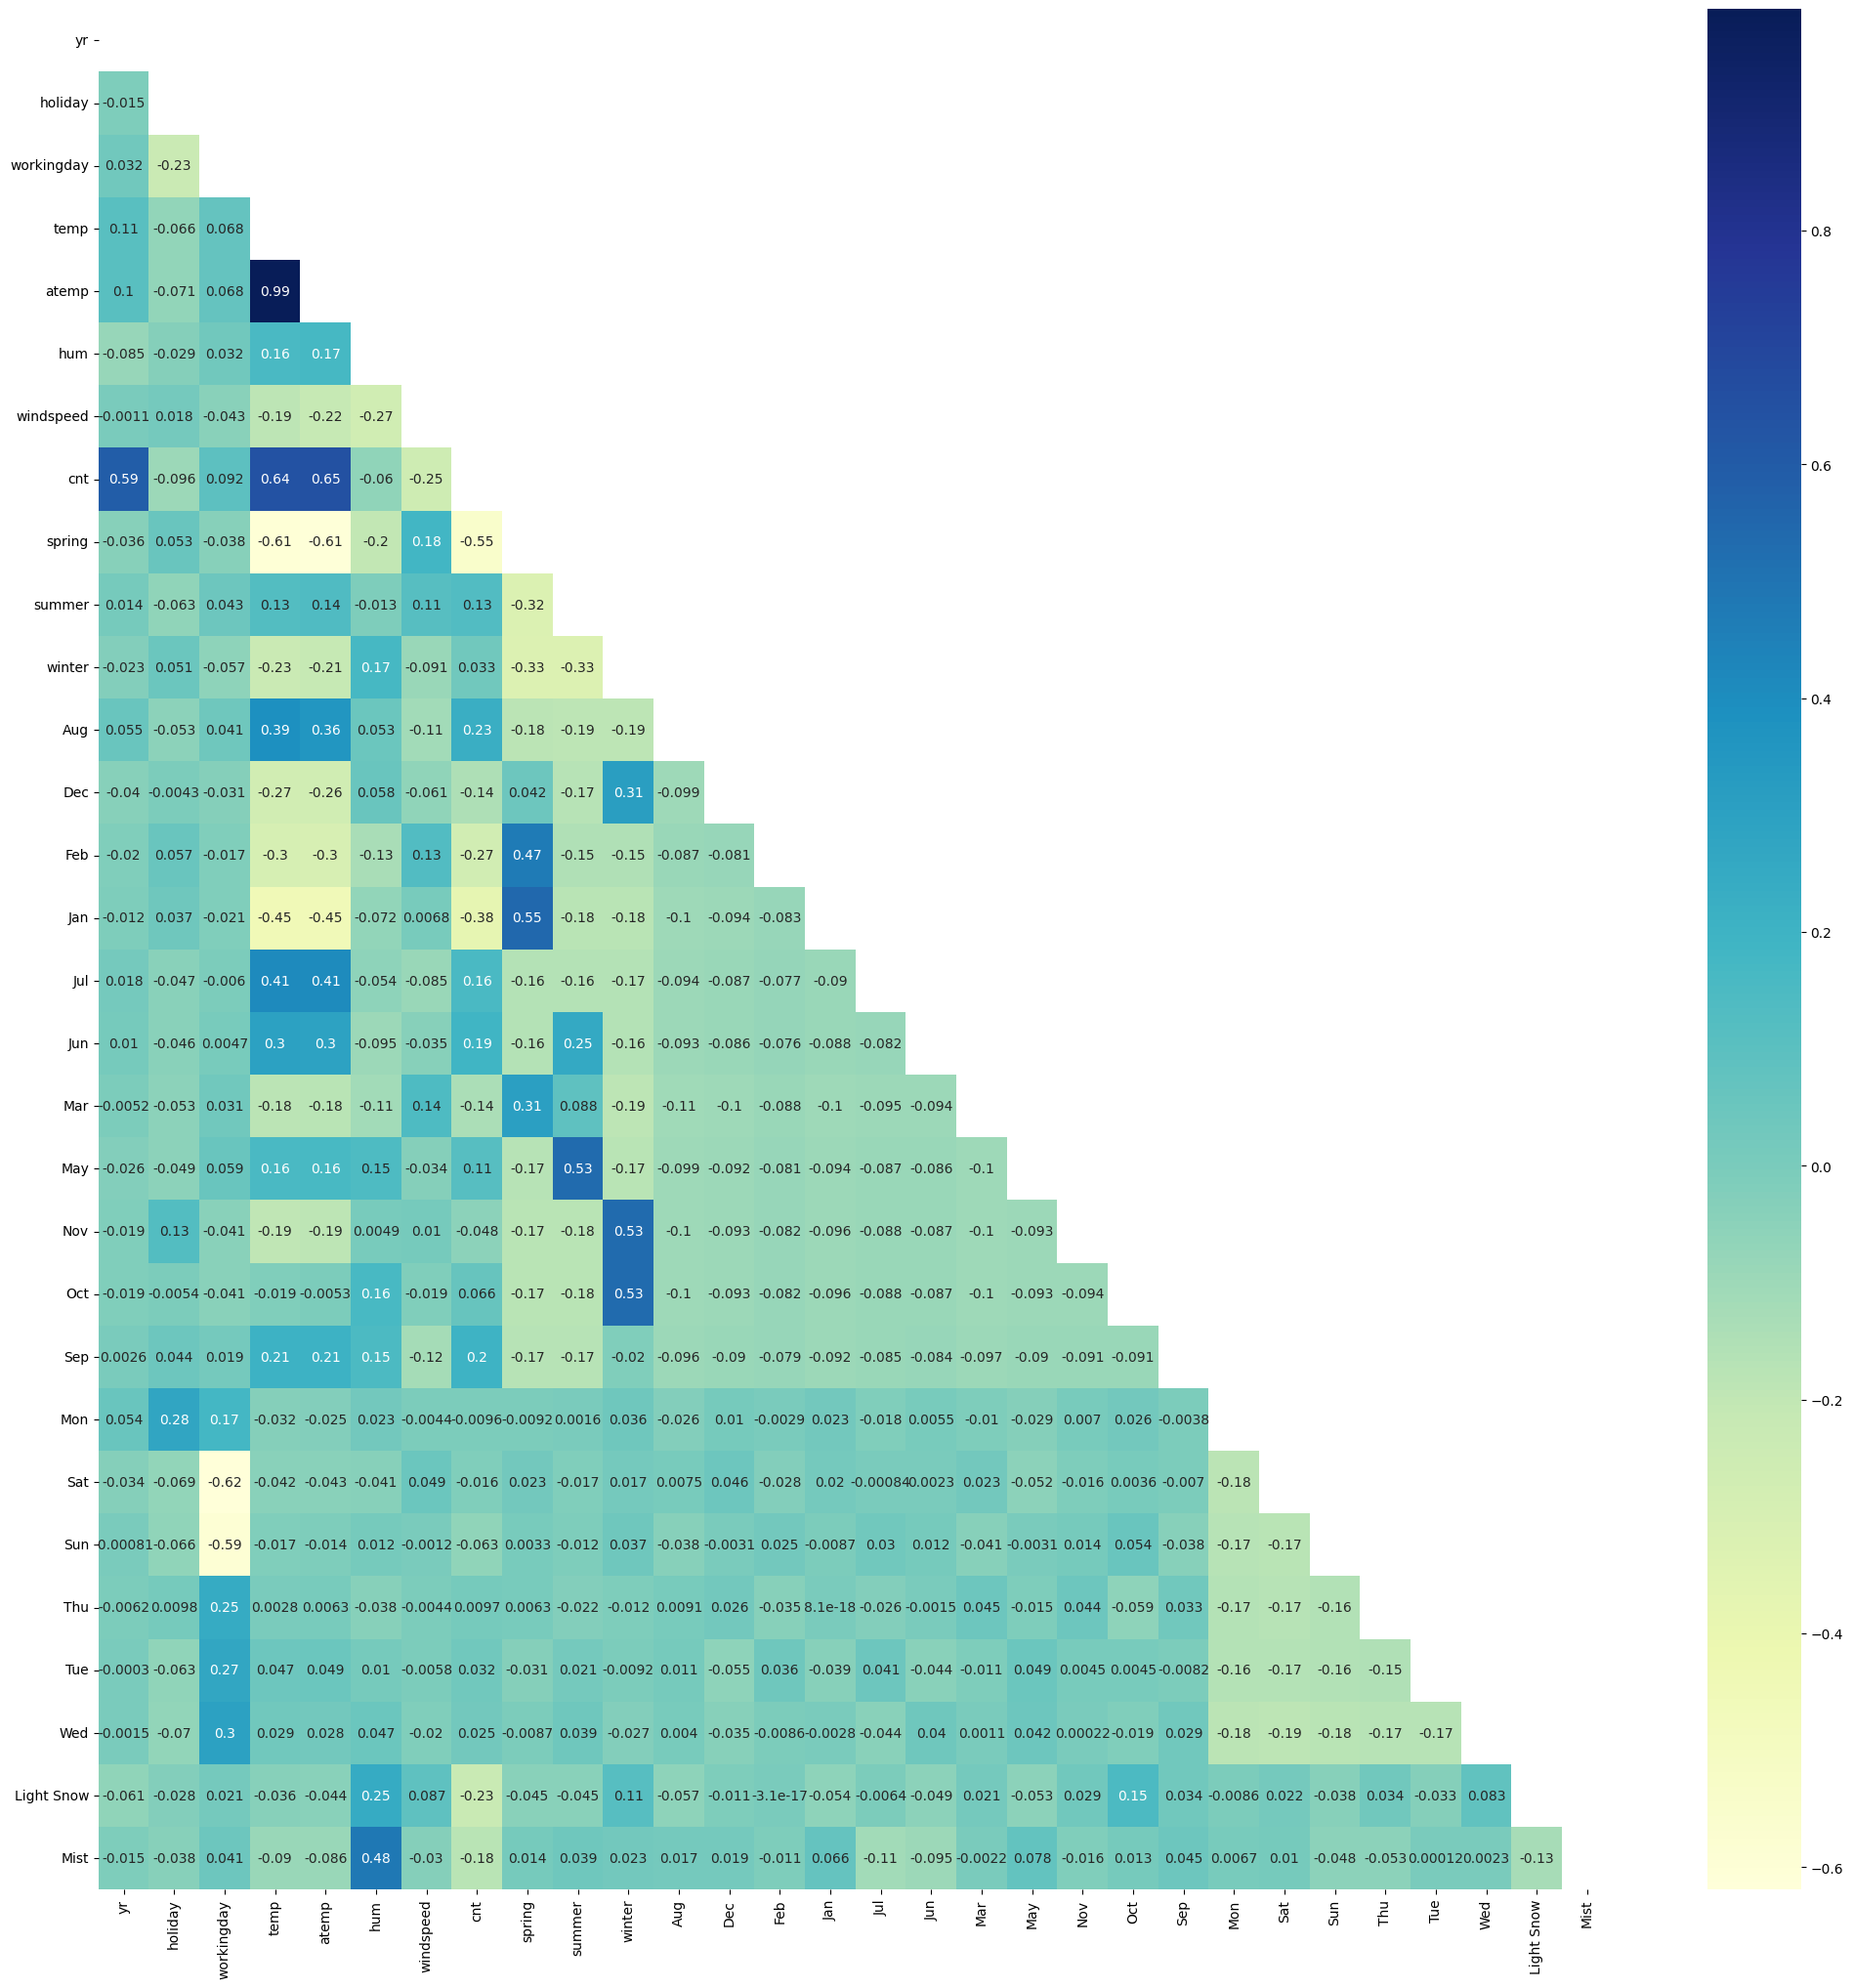

In [39]:
# Checking the correlation matrix for the train data
plt.figure(figsize = (25,25))
matrix = np.triu(bikeshare_train.corr())
sns.heatmap(bikeshare_train.corr(), annot = True, cmap="YlGnBu", mask=matrix)
plt.show()

Observations from the correlation matrix:
1. temp and atemp are highly correlated, so we can drop one of them
2. cnt is highly correlated with yr, temp and atemp
3. Mist and hum are highly correlated
4. Nov and Oct with winter are highly correlated
5. Jan and Feb with spring are highly correlated

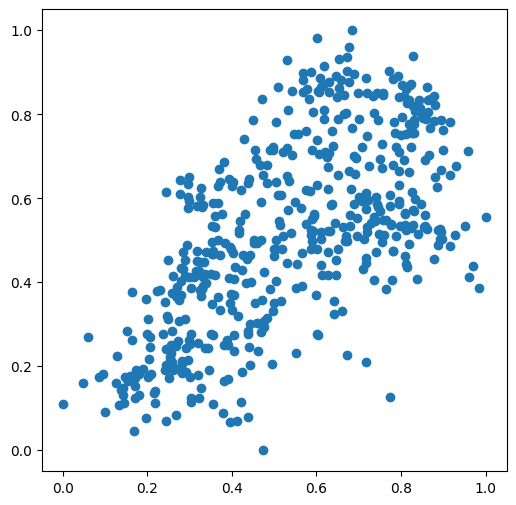

In [40]:
# Visualising the correlation matrix for the train data on the scatter plot
plt.figure(figsize=[6,6])
plt.scatter(bikeshare_train.temp, bikeshare_train.cnt)
plt.show()

Scatter plot confirms high correlation between temp and cnt

In [41]:
# Building the model
# Dividing the train data into X and y
y_train = bikeshare_train.pop('cnt')
X_train = bikeshare_train

In [48]:
# Feature selection using RFE
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(estimator=lm, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [49]:
# Checking the ranking of the features
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', False, 14),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', False, 2),
 ('summer', True, 1),
 ('winter', True, 1),
 ('Aug', True, 1),
 ('Dec', False, 7),
 ('Feb', False, 15),
 ('Jan', False, 3),
 ('Jul', False, 10),
 ('Jun', False, 6),
 ('Mar', False, 5),
 ('May', False, 4),
 ('Nov', False, 8),
 ('Oct', True, 1),
 ('Sep', True, 1),
 ('Mon', False, 9),
 ('Sat', True, 1),
 ('Sun', True, 1),
 ('Thu', False, 12),
 ('Tue', False, 11),
 ('Wed', False, 13),
 ('Light Snow', True, 1),
 ('Mist', True, 1)]

In [50]:
# Creating a dataframe with the columns and their respective rankings
col = X_train.columns[rfe.support_]
print(col)

Index(['yr', 'holiday', 'workingday', 'atemp', 'hum', 'windspeed', 'summer',
       'winter', 'Aug', 'Oct', 'Sep', 'Sat', 'Sun', 'Light Snow', 'Mist'],
      dtype='object')


In [51]:
# Checking the variables which are not selected
X_train.columns[~rfe.support_]

Index(['temp', 'spring', 'Dec', 'Feb', 'Jan', 'Jul', 'Jun', 'Mar', 'May',
       'Nov', 'Mon', 'Thu', 'Tue', 'Wed'],
      dtype='object')

In [52]:
# Generic function to calculate VIF of variables

def calculateVIF(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif 

In [53]:
# dataframe with the selected features
X_train_rfe = X_train[col]

In [54]:
# Checking the VIF of the variables
calculateVIF(X_train_rfe)

,Features,VIF
2,workingday,31.53
11,Sat,7.79
12,Sun,7.67
1,holiday,2.14
4,hum,1.88
7,winter,1.71
3,atemp,1.57
14,Mist,1.57
9,Oct,1.49
8,Aug,1.42


workingday is having high VIF

# Step 5: Model Building

In [55]:
# Building the 1st linear regression model
X_train_lm_1 = sm.add_constant(X_train_rfe)
lm_1 = sm.OLS(y_train, X_train_lm_1).fit()
print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     190.2
Date:                Tue, 09 Jan 2024   Prob (F-statistic):          8.44e-189
Time:                        00:21:42   Log-Likelihood:                 511.02
No. Observations:                 510   AIC:                            -992.0
Df Residuals:                     495   BIC:                            -928.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1634      0.022      7.362      0.0

In [56]:
# Dropping the workingday column as it has high p-value
X_train_new = X_train_rfe.drop(['workingday'], axis=1)

# Recalculating the VIF
calculateVIF(X_train_new)

,Features,VIF
3,hum,15.16
2,atemp,9.95
4,windspeed,3.63
6,winter,2.25
13,Mist,2.16
0,yr,2.01
5,summer,1.84
8,Oct,1.61
7,Aug,1.56
9,Sep,1.33


In [57]:
# Dropping the hum column as it has high p-value
X_train_new = X_train_new.drop(['hum'], axis=1)

# Recalculating the VIF
calculateVIF(X_train_new)

,Features,VIF
2,atemp,5.12
3,windspeed,3.16
0,yr,2.00
5,winter,1.97
4,summer,1.83
7,Oct,1.60
6,Aug,1.56
12,Mist,1.49
8,Sep,1.33
9,Sat,1.22


VIF values are within the acceptable range, we can check for further scope to reduce the VIF values

In [58]:
# Building the 2nd linear regression model
X_train_lm_2 = sm.add_constant(X_train_new)
lm_2 = sm.OLS(y_train, X_train_lm_2).fit()
print(lm_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     195.2
Date:                Tue, 09 Jan 2024   Prob (F-statistic):          1.87e-185
Time:                        00:24:34   Log-Likelihood:                 500.30
No. Observations:                 510   AIC:                            -972.6
Df Residuals:                     496   BIC:                            -913.3
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1390      0.017      8.056      0.0

In [59]:
# Dropping the Sat column as it has high p-value
X_train_new = X_train_new.drop(['Sat'], axis=1)

# Recalculating the VIF
calculateVIF(X_train_new)

,Features,VIF
2,atemp,5.09
3,windspeed,3.08
0,yr,2.00
5,winter,1.96
4,summer,1.83
7,Oct,1.60
6,Aug,1.56
11,Mist,1.49
8,Sep,1.33
9,Sun,1.17


Not much change in the VIF values after dropping the Sat column. Building the 3rd linear regression model

In [60]:
# Building the 3rd linear regression model
X_train_lm_3 = sm.add_constant(X_train_new)
lm_3 = sm.OLS(y_train, X_train_lm_3).fit()
print(lm_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     211.5
Date:                Tue, 09 Jan 2024   Prob (F-statistic):          1.86e-186
Time:                        00:26:20   Log-Likelihood:                 499.89
No. Observations:                 510   AIC:                            -973.8
Df Residuals:                     497   BIC:                            -918.7
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1411      0.017      8.247      0.0

In [61]:
# Dropping the Oct column as it has high p-value
X_train_new = X_train_new.drop(['Oct'], axis=1)

# Recalculating the VIF
calculateVIF(X_train_new)

,Features,VIF
2,atemp,4.99
3,windspeed,3.07
0,yr,2.00
4,summer,1.82
6,Aug,1.55
5,winter,1.51
10,Mist,1.49
7,Sep,1.30
8,Sun,1.17
9,Light Snow,1.08


VIF is less than 5 for all the variables

In [62]:
# Building the 4th linear regression model
X_train_lm_4 = sm.add_constant(X_train_new)
lm_4 = sm.OLS(y_train, X_train_lm_4).fit()
print(lm_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     228.7
Date:                Tue, 09 Jan 2024   Prob (F-statistic):          1.13e-186
Time:                        00:27:56   Log-Likelihood:                 497.58
No. Observations:                 510   AIC:                            -971.2
Df Residuals:                     498   BIC:                            -920.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1360      0.017      8.002      0.0

This model is good as all the variables have low p-value and VIF is also less than 5. F-statistic is 1.13e-186 which is almost 0. R-squared is 0.835 which is good.

In [63]:
# Checking the parameters of the model
lm_4.params

const         0.136008
yr            0.233266
holiday      -0.101776
atemp         0.537863
windspeed    -0.131932
summer        0.096836
winter        0.133600
Aug           0.065053
Sep           0.118136
Sun          -0.048648
Light Snow   -0.282291
Mist         -0.085505
dtype: float64

# Step 6: Residual Analysis of the train data

In [64]:
X_train_lm_4

,const,yr,holiday,atemp,windspeed,summer,winter,Aug,Sep,Sun,Light Snow,Mist
653,1.0,1,0,0.501133,0.300794,0,1,0,0,0,0,0
576,1.0,1,0,0.766351,0.264686,0,0,0,0,0,0,0
426,1.0,1,0,0.438975,0.255342,0,0,0,0,0,0,1
728,1.0,1,0,0.200348,0.663106,0,0,0,0,1,0,0
482,1.0,1,0,0.391735,0.188475,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
526,1.0,1,0,0.762183,0.355596,1,0,0,0,0,0,1
578,1.0,1,0,0.824359,0.187140,0,0,1,0,0,0,0
53,1.0,0,0,0.218747,0.111379,0,0,0,0,0,0,0
350,1.0,0,0,0.223544,0.431816,0,1,0,0,0,0,1


In [65]:
y_train_pred = lm_4.predict(X_train_lm_4)

Normality of the error terms

Text(0.5, 0, 'Errors')

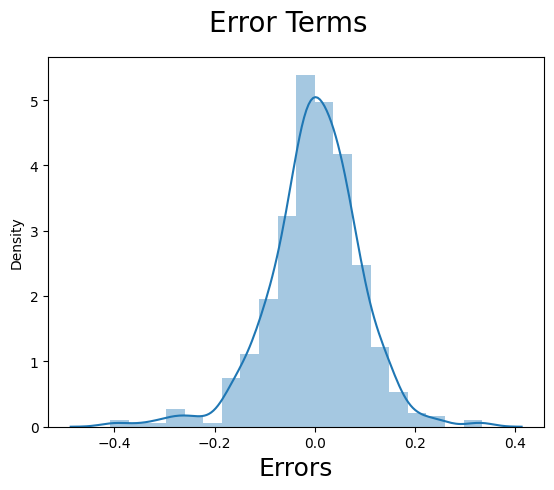

In [66]:
# Checking the normality of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20) 
plt.xlabel('Errors', fontsize = 18)

Error terms are normally distributed with mean 0

# Multi collinearity check

In [67]:
calculateVIF(X_train_new)

,Features,VIF
2,atemp,4.99
3,windspeed,3.07
0,yr,2.00
4,summer,1.82
6,Aug,1.55
5,winter,1.51
10,Mist,1.49
7,Sep,1.30
8,Sun,1.17
9,Light Snow,1.08


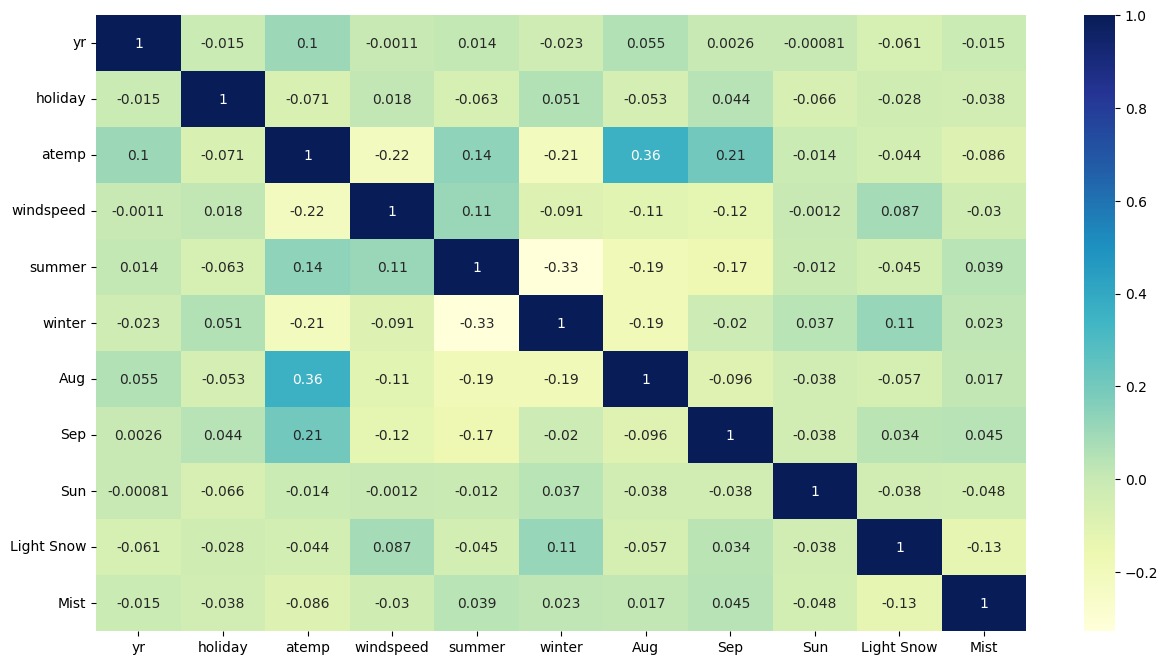

In [69]:
# Checking the heatmap for the train data
plt.figure(figsize=(15,8))
sns.heatmap(X_train_new.corr(),annot = True, cmap="YlGnBu")
plt.show()

There is no multicollinearity in the train data as all the VIF values are less than 5

# Homoscedasticity check

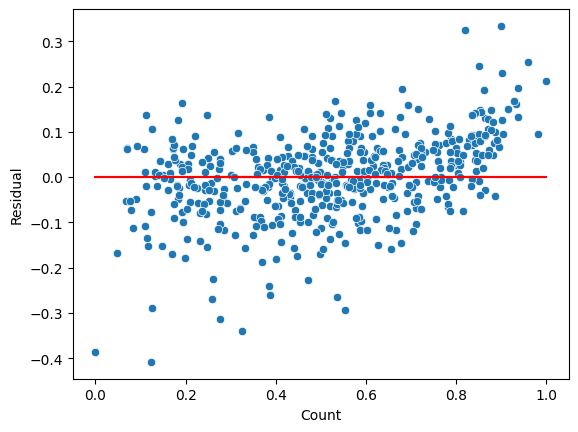

In [72]:
y_train_pred = lm_4.predict(X_train_lm_4)
residual = y_train - y_train_pred
sns.scatterplot(x=y_train, y=residual)
plt.plot(y_train,(y_train - y_train), '-r')
plt.xlabel('Count')
plt.ylabel('Residual')
plt.show()

From the homoescedasticity plot, we can see that the residuals are not randomly distributed around the line.

# Step 7: Making Predictions Using the Final Model

In [73]:
# Scaling the test data
num_vars = ['temp','atemp','hum','windspeed','cnt']
bikeshare_test[num_vars] = scaler.transform(bikeshare_test[num_vars])

In [74]:
# describing the test data
bikeshare_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.698630,0.558941,0.532991,0.638508,0.313350,0.520592,0.255708,0.264840,...,0.082192,0.086758,0.127854,0.118721,0.146119,0.164384,0.164384,0.100457,0.027397,0.319635
std,0.500722,0.188034,0.459904,0.233698,0.217888,0.148974,0.159947,0.218435,0.437258,0.442259,...,0.275286,0.282125,0.334692,0.324202,0.354034,0.371472,0.371472,0.301297,0.163612,0.467403
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354650,0.344751,0.527265,0.198517,0.377531,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558691,0.549198,0.627737,0.299459,0.524275,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.759096,0.714132,0.743928,0.403048,0.672745,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [75]:
# Dividing the test data into X and y
y_test = bikeshare_test.pop('cnt')
X_test = bikeshare_test

In [76]:
# Creating a dataframe with the selected features
col1 = X_train_new.columns
X_test_new = X_test[col1]

# Adding a constant variable
X_test_lm_4 = sm.add_constant(X_test_new)

In [77]:
y_test_pred = lm_4.predict(X_test_lm_4)

In [80]:
# r2 score for the test data
r2 = r2_score(y_true=y_test, y_pred=y_test_pred)
round(r2, 3)

0.798

# Step 8: Model Evaluation

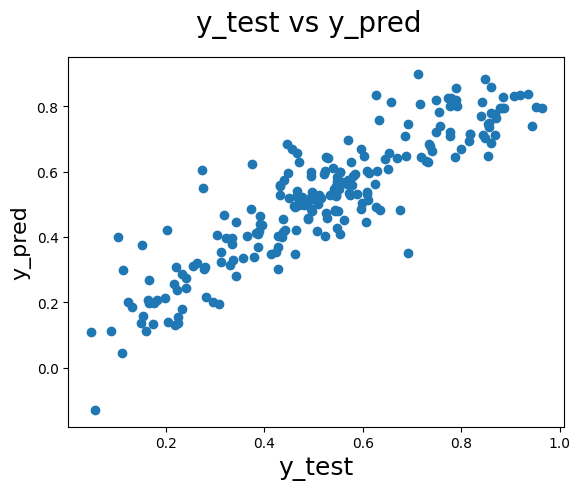

In [81]:
# Plotting y_test and y_pred to understand the spread
fig = plt.figure()
plt.scatter(y_test,y_test_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)
plt.show()

In [85]:
round(lm_4.params,3)

const         0.136
yr            0.233
holiday      -0.102
atemp         0.538
windspeed    -0.132
summer        0.097
winter        0.134
Aug           0.065
Sep           0.118
Sun          -0.049
Light Snow   -0.282
Mist         -0.086
dtype: float64

# Based on the above analysis, the final model is:
cnt = 0.136 + 0.233*yr - 0.102*holiday + 0.538*atemp - 0.132*windspeed + 0.097*summer + 0.134*winter + 0.065*Aug + 0.118*Sep - 0.049*Sun - 0.282*Light Snow - 0.086*Mist

In [87]:
# Calculating the Adjusted R-squared value
adjusted_r2 = round(1-(1-r2)*(X_test_new.shape[0]-1)/(X_test_new.shape[0]-X_test_new.shape[1]-1),4)
print(adjusted_r2)

0.7869


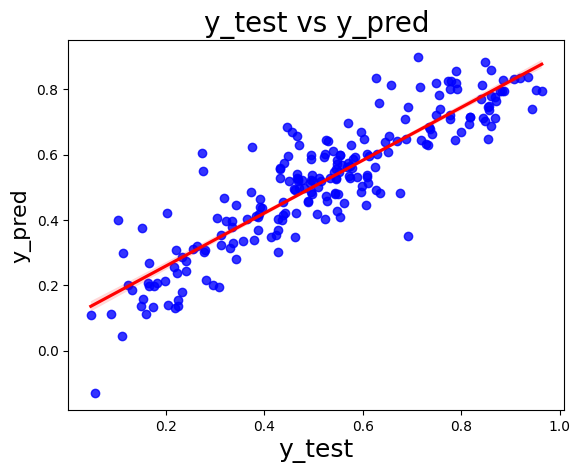

In [88]:
# Visualizing the best fit line using regplot

plt.figure()
sns.regplot(x=y_test, y=y_test_pred, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)
plt.show()


# Compasrion of R2 and Adjusted R2 of train and test data sets

1. Train dataset R2 score: 0.835
2. Test dataset R2 score: 0.798
3. Train dataset Adjusted R2 score: 0.831
4. Test dataset Adjusted R2 score: 0.786

Demand of the bikes depends on yr, holiday, atemp, windspeed, summer, winter, Sun, light snow, Aug, Sep and Mist